<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_Infrared_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Infrared.csv')
print(df.head())

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.4775  33.3725   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0550  33.6775   
2     0.8625    35.6525    35.5175      34.2775  ...  34.8275  34.6475   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4225  34.6550   
4     0.8950    35.5450    35.6650      34.9100  ...  35.1600  34.3975   

   T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  \
0  33.4925  33.0025    34.5300     

In [17]:
target_col = 'aveOralM'
if target_col not in df.columns:
    raise ValueError(f"Kolom {target_col} tidak ditemukan dalam dataset.")

X = df.drop(columns=[target_col])
y = df[target_col]

# Identifikasi kolom numerik dan kategorikal
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Mengisi NaN dengan mean
    ('scaler', StandardScaler())  # Normalisasi data numerik
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Isi NaN dengan mode (nilai terbanyak)
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding untuk kategori
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)



K-NN

In [18]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_transformed, y_train)
y_pred_knn = knn.predict(X_test_transformed)

Decision Tree

In [19]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_transformed, y_train)
y_pred_dt = dt.predict(X_test_transformed)

Print Hasil K-NN dan Decision Tree

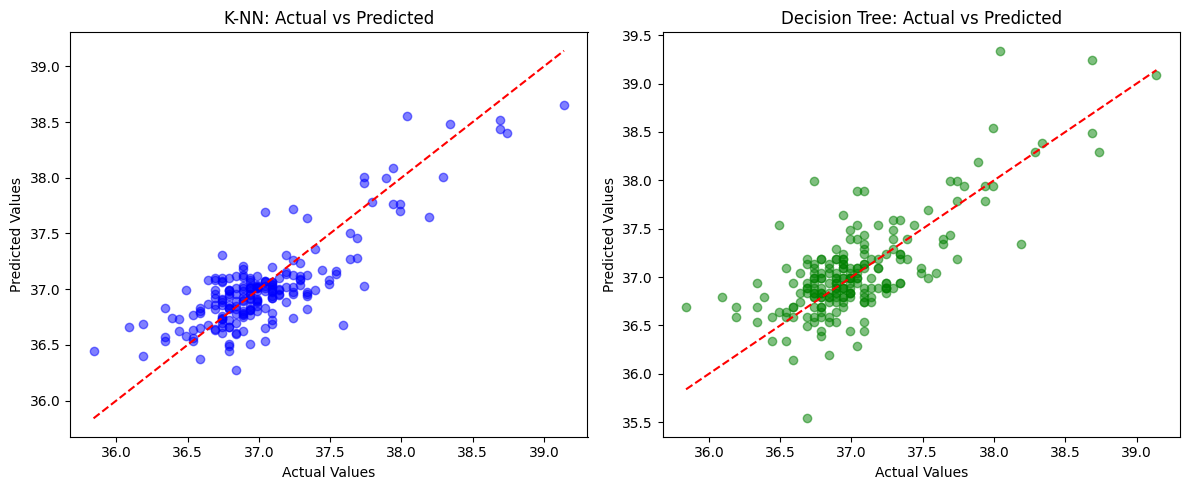

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Scatter plot untuk KNN
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  # Garis diagonal ideal
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("K-NN: Actual vs Predicted")

# Scatter plot untuk Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.5, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  # Garis diagonal ideal
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree: Actual vs Predicted")

plt.tight_layout()
plt.show()

Model Evaluasi

In [23]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

Print Hasil Evaluasi

In [24]:
print("\nEvaluasi K-NN:")
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"R-Squared: {r2_knn:.4f}")

print("\nEvaluasi Decision Tree:")
print(f"MSE: {mse_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")
print(f"R-Squared: {r2_dt:.4f}")


Evaluasi K-NN:
MSE: 0.0648
RMSE: 0.2545
R-Squared: 0.6924

Evaluasi Decision Tree:
MSE: 0.1154
RMSE: 0.3397
R-Squared: 0.4521


#Penjelasan Persamaan Matematika

##1. Standarisasi Data: StandarScaler()
Persamaan matematika yang digunakan:

$X_{scaled} = \frac{X-μ}{σ}$

Di mana:
- $X$ = nilai asli dari fitur numerik,
- $μ$ = mean (rata-rata) dari fitur tersebut,
- $σ$ = standar deviation (Simpangan baku) dari fitur tersebut.

Standarisasi mengubah distribusi data agar memiliki mean 0 dan standar deviasi 1. Ini penting karena KKN dan Decision Tree bisa terpengaruh oleh skala fitur yang berbeda.

##2. One-Hot Encoding
Konesep matematikanya misal, kita memiliki kategori Gender dengan nilai Male, Femal. One-Hot Encoding mengubah ini menjadi:

|Gender | Male(0/1) | Female(0/1) |
|-------|-----------|-------------|
|Male|1|0
|Female|0|1

Dengan encoding ini, model tidak menganggap perbedaan numerik antar kategori. Ini membantu menghindari bias numerik yang tidak bermakna pada variabel kategori.

##3. K-Nearest Neighbors (KNN)
Persamaan matematika utama dalam KNN adalah metrik jarak. Yang paling umum adalah Euclidan Distance:

$d(A,B) = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2+...}$

Di mana:
- $A, B$ = dua titik dalam ruang fitur,
- $x_1,x_2,...,x_n$ = nilai fitur dari dua titik tersebut.

Model mencari 5 tetangga terdekat dari titik yang akan diprediksi. Jarak kemudian dihitung menggunakan rumus Euclidan. Nilai target rata-rata dari 5 tetangga terdekat digunakan sebagai prediksi.

##4. Decision Tree Regression
Persamaan matemarika utama: Mean Squared Error (MSE) Reduction untuk memisahkan data, Decision Tree mencari pemisahan yang meminimalkan MSE:

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y})^2$

Di mana:
- $n$ = jumlah data dalam satu node,
- $y_i$ = nilai target aktual,
- $\hat{y}$ = rata-rata nilai target dalam node tersebut.

Decision Tree mencari pembagian terbaik berdasarkan fitur. Pembagian terbaik adalah yang mengurangi MSE sebanyak mungkin. Setelah model terbentuk, prediksi dilakukan dengan mengikuti cabang pohon hingga ke leaf node.

##5. Mean Squared Error (MSE)
Persamaan:

$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y})^2$

Di mana:
- $n$ = jumlah sampel,
- $y_i$ = nilai aktual,
- $\hat{y}$ = nilai prediksi.


MSE mengukur seberapa jauh prediksi dari nilai sebenarnya. Semakin kecil MSE, semakin baik modelnya.

##6. Root Mean Squared Error (RMSE)

$RMSE = \sqrt{MSE}$

RMSE lebih mudah dipahami karena memiliki satuan yang sama dengan target asli. RMSE lebih sensitif terhadap outlier dibandingkan MSE.

##7. R-Squared (R² Score)
Persamaan:

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

Di mana:

$SS_{res} = \sum(y_i-\hat{y})^2$

$SS_{tot} = \sum(y_i-\overline{y})^2$

- $SS_{res}$ = jumlah kuadrat dari residual (error),
- $SS_{tot}$ = jumlah kuadrat total (variasi dari data asli),
- $\overline{y}$ = rata-rata dari nilai target.

Nilai $R^2 = 1$  berarti model sempurna (tidak ada error). Nilai $R^2 = 0$ berarti model tidak lebih baik daripada rata-rata. Jika $R^2$ negatif, berarti model sangat buruk.
